# Basic usage Array2DScanAnalyzer

This notebook demonstrates the basic intended usage of Array2DScanAnalyzer. This object is meant as a compliment to ImageAnalysis to manage and perform ImageAnalysis functionality across a scan. It includes some basic functionality to perofrm the analysis in multi processing or multi threading.

The result of the using Array2DScanAnalyzer is that the analysis results from ImageAnalysis are added to the sFile and it produces some rendered results. For a 1D scan, images are averaged and binned while for 'noscan' a gif is created. These rendered results are added to the 'analysis' directory along with the averaged images by Bin stored in .hdf5 format. 

Array2DScanAnalyzer also exposes the rendered results such that they can be automatically added to the elogs generated by Logmaker4GoogleDocs. This does require that the machine running the code has full credentialed access to the shared drives. 

In [1]:
import logging

from geecs_data_utils import ScanPaths
from scan_analysis.base import ScanAnalyzerInfo as Info
from scan_analysis.execute_scan_analysis import instantiate_scan_analyzer
from scan_analysis.analyzers.common.array2D_scan_analysis import Array2DScanAnalyzer

# import the desired ImageAnalyzer
from image_analysis.offline_analyzers.beam_analyzer import BeamAnalyzer

# BeamAnalyzer uses a configuration file for instantiation and use. So,
# we need to set the config path. But, any type of ImageAnalzyer can be used.
from image_analysis.config_loader import set_config_base_dir

# Set the logging level. Can set to INFO or DEBUG to get more detail about the
# actual execution
logging.getLogger("image_analysis").setLevel(logging.ERROR)
logging.getLogger("scan_analysis").setLevel(logging.WARNING)
logging.getLogger("geecs_data_utils").setLevel(logging.WARNING)
logging.getLogger("logmaker_4_googledocs").setLevel(logging.ERROR)


set_config_base_dir(ScanPaths.paths_config.image_analysis_configs_path)

2025-11-11 09:23:41,988 - scan_analysis.execute_scan_analysis - WARNING - Docgen import failed ('script'); disabling.


Failed to load config file from: D:\Users\sbarber.BELLAAPPSERVER\Documents\GitHub\GEECS-Plugins\LogMaker4GoogleDocs\logmaker_4_googledocs\config.ini


Instantiate the ImageAnalyzer. Note, here the device name is also used to point to a configuration yaml file found in teh 'config_base_dir' set above

In [2]:
dev_name = "UC_Amp4_IR_input"
image_analyzer = BeamAnalyzer(camera_config_name=dev_name)

In [3]:
import time
from geecs_data_utils import ScanTag
from scan_analysis.analyzers.renderers.image_2d_renderer import Image2DRenderer, Image2DRendererConfig

t0 = time.monotonic()

# ScanAnalyzers use ScanTag as an arg, which is a unique identifier, to
# determine which scan to process
year = 2025
month = 2
day = 20
number = 14
experiment = "Undulator"
test_tag = ScanTag(
    year=year, month=month, day=day, number=number, experiment=experiment
)

scan_analyzer = Array2DScanAnalyzer(device_name=dev_name, 
                                    image_analyzer=image_analyzer,
                                   renderer_kwargs={'figsize':(5,5)})

# run the analysis
scan_analyzer.run_analysis(scan_tag=test_tag)

t1 = time.monotonic()
print(f"execution time: {t1 - t0}")

2025-11-11 09:24:21,153 - scan_analysis.base - WARNING - No parameter varied during the scan, setting noscan flag.


execution time: 58.639999999664724


When the execution is complete, we can inspect indivdiual images

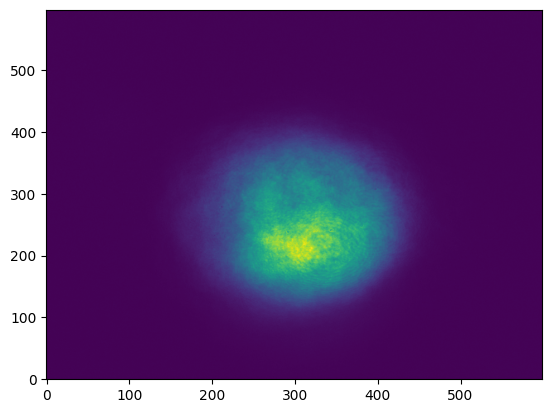

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline

array = scan_analyzer.results[10].processed_image
im = plt.imshow(array, cmap="viridis", origin="lower", aspect="auto")
plt.show()